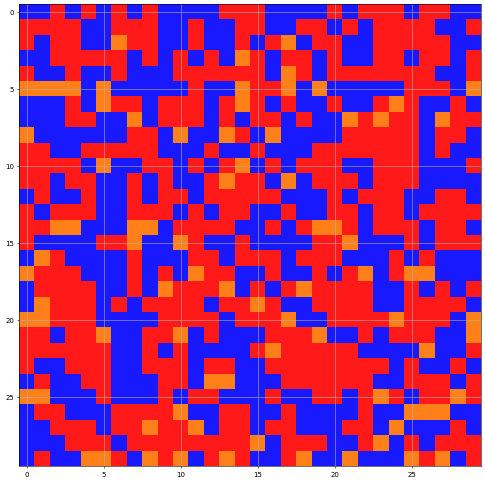

KeyboardInterrupt: 

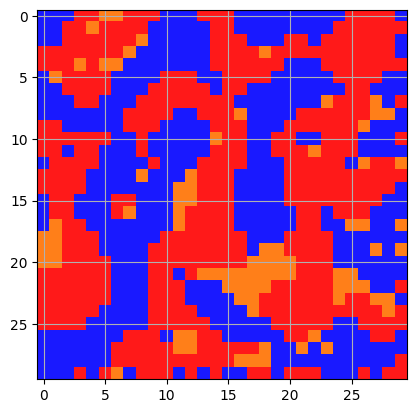

In [3]:
%matplotlib inline
# import
import itertools
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import random
import time
from IPython import display
# defining 0=blue, 1=red, 2=empty
candidates = [0, 1, 2]
# defining the weights of each color
weights = [45, 45, 10]
# our grid empty
grid = []
# counters ofr each populations
count_0 = 0
count_1 = 0
count_2 = 0
RANDOM = False # if true, the agents will move randomly until they find a empty cell
# rows and cols of the grid
ROWS, COLS = 30, 30
# building the grid
for _ in range(ROWS):
    row = random.choices(candidates, weights=weights, k=COLS)
    count_0 += row.count(0)
    count_1 += row.count(1)
    count_2 += row.count(2)
    grid.append(row)
print(grid)
print(f"number of reds: {count_0}")
print(f"number of blue: {count_1}")
print(f"number of empty: {count_2}")

# ---------- showing the grid ------------
labels = {0: "blue", 1: "red", 2: "empty"}
cmap = {0: [0.1, 0.1, 1.0, 1], 1: [1.0, 0.1, 0.1, 1], 2: [1.0, 0.5, 0.1, 1]}
arrayShow = np.array([[cmap[i] for i in j] for j in grid])
# create patches as legend
patches = [mpatches.Patch(color=cmap[i], label=labels[i]) for i in cmap]

plt.figure(figsize=(8, 8))
plt.legend(labels)
plt.imshow(arrayShow)
plt.legend(handles=patches, loc=4, borderaxespad=0.)
plt.grid(True)
plt.show()

# first way to get the neighbors. Not efficient. Discarded


def create_majority_matrix(grid):

    grid2 = np.full((ROWS+2, COLS+2), -1)

    # Copy the elements from the original matrix grid
    grid2[1:ROWS+1, 1:COLS+1] = grid

    # Insert the new rows at the beginning and end of the matrix
    grid2[0, 1:COLS+1] = grid[-1]
    grid2[ROWS+1, 1:COLS+1] = grid[0]

    # Insert the new columns at the beginning and end of each row
    grid2[:, 0] = grid2[:, -2]
    grid2[:, -1] = grid2[:, 1]
    return grid2


# grid2 = create_majority_matrix(grid)

fig = plt.figure(figsize=(12, 12), dpi=50) # create a figure
counter = 0 # counter for the iterations
happy_array = np.random.choice(a=[False, True], size=(ROWS, COLS)) # grid of booleans to check if the cell is happy
ITER = 10000 # max iterations

def check_boundaries(pos_x,pos_y):
    if (pos_x < 0):
        pos_x = ROWS-1
    if (pos_x >= ROWS):
        pos_x = 0
    if (pos_y < 0):
        pos_y = COLS-1
    if (pos_y >= COLS):
        pos_y = 0
    return pos_x, pos_y
# main loop
while (counter < ITER):
    if (counter % 1000 == 0): # every x iterations, show the grid
        print(f"iteration # {counter}")
    # for each row and column
    for i, j in itertools.product(range(ROWS), range(COLS)):

        count_same_race = 0 # counter for counting number of same race neighbors
        # conditions if the cell is on the edge of the grid
        if (i-1 < 0):
            indx = ROWS-1
        indx = 0 if (i+1 > ROWS-1) else i
        if (j-1 < 0):
            indy = COLS-1
        if (j+1 > COLS-1):
            indy = 0
        else:
            indy = j

        if (grid[indx][indy] == grid[indx-1][indy]):
            count_same_race += 1

        if (grid[indx][indy] == grid[indx][indy-1]):
            count_same_race += 1

        if (grid[indx][indy] == grid[indx-1][indy-1]):
            count_same_race += 1

        if (grid[indx][indy] == grid[indx+1][indy]):
            count_same_race += 1

        if (grid[indx][indy] == grid[indx][indy+1]):
            count_same_race += 1

        if (grid[indx][indy] == grid[indx+1][indy+1]):
            count_same_race += 1

        if (grid[indx][indy] == grid[indx+1][indy-1]):
            count_same_race += 1
        if (grid[indx][indy] == grid[indx-1][indy+1]):
            count_same_race += 1
            # check if the cell is happy

        happy_array[i][j] = count_same_race > 3 # updating happy matrix
    # loop for moving the unhappy agents
    for i in range(ROWS):
        for j in range(COLS):
            # perform actions only if the cell is unhappy and not empty
            if (grid[i][j] != 2 and happy_array[i][j] == False):
                # random method. Moving randmly until finding an empty cell
                if (RANDOM == True):

                    direction_axis_0 = random.choice([0, 1, -1]) # random direction on x
                    direction_axis_1 = random.choice([0, 1, -1]) # random direction on y
                    pos_x, pos_y = (i+direction_axis_0), (j+direction_axis_1) # new position
                    # conditions for checking if the new position is out of range
                    pos_x, pos_y=check_boundaries(pos_x, pos_y)
                    # loop to check if the new position is empty
                    while (grid[pos_x][pos_y] != 2):
                        direction_axis_0 = random.choice([0, 1, -1])
                        direction_axis_1 = random.choice([0, 1, -1])
                        pos_x += direction_axis_0
                        pos_y += direction_axis_1
                        pos_x, pos_y = check_boundaries(pos_x, pos_y)
                else:
                    pos_x, pos_y = i, j # current position 
                    radius = 1 # starting with radius equal to 1
                    flag = False
                    while not flag: # until the empty cell is not found
                        for x in range(pos_x-radius, pos_x+radius):
                            for y in range(pos_y-radius, pos_y+radius):
                                if (x < 0):
                                    x = ROWS-1
                                if (y < 0):
                                    y = COLS-1
                                if (x >= ROWS):
                                    x = 0
                                if (y >= COLS):
                                    y = 0
                                if (grid[x][y] == 2):
                                    flag = True 
                                    pos_x, pos_y = x, y # updating the new position
                                    break # exit if the empty cell is found
                            if (flag):
                                break # exit if the empty cell is found
                        radius += 1 # increasing the radius
                        #radius*=-1  just to invert the direction of the search
                # moving the angent and update the old position with an empty cell
                tmp = grid[i][j]
                grid[i][j] = 2
                grid[pos_x][pos_y] = tmp
                            # grid2 = create_majority_matrix(grid)
    # if(counter%1000==0):
    # now we plot the new updated grid
    labels = {0: "blue", 1: "red", 2: "empty"}
    cmap = {0: [0.1, 0.1, 1.0, 1], 1: [
        1.0, 0.1, 0.1, 1], 2: [1.0, 0.5, 0.1, 1]}
    arrayShow = np.array([[cmap[i] for i in j] for j in grid])
    # create patches as legend
    patches = [mpatches.Patch(color=cmap[i], label=labels[i]) for i in cmap]

    plt.imshow(arrayShow)
    plt.grid(True)
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.001)
    counter += 1 # increasing the counter iterations

# plt.pause(0.0001)
